# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Introducción al aprendizaje automático

### Trabajo práctico entregable - Grupo 22 - Parte 1: Regresión en California

**Integrantes:**
- Chevallier-Boutell, Ignacio José
- Ribetto, Federico Daniel
- Rosa, Santiago
- Spano, Marcelo

**Seguimiento:** Meinardi, Vanesa

---

## Librerías

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

sns.set_context('talk')
sns.set_theme(style='white')

## Dataset

### Acerca del dataset

Utilizaremos el conjunto de datos *California house prices dataset* disponible en `sklearn`, obtenido a su vez del repositorio `StatLib`. En el mismo se ha recolectado información basado en el censo de California de 1990. En esta entrega se pretende experimentar con diferentes regresiones, buscando las configuraciones que arrojen los mejores resultados sobre este dataset.

### Lectura del dataset

Cargamos el conjunto de datos y vemos su contenido:
* Tenemos 8 variables predictoras (MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude y Longitude).
* Contamos con 20.640 registros.
* La matriz de atributos resulta entonces ser 20.640 $\times$ 8.

In [26]:
from sklearn.datasets import fetch_california_housing

# Treamos la data (matriz con los datos de entrada / atributos) en X
# y el target (vector de valores a predecir) en y, ambos como pandas DataFrame
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Traemos todo el dataset, con toda su descripción
california = fetch_california_housing()

In [27]:
print(california['DESCR'])  # Descripción del dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [28]:
display(X.head())
X.shape

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(20640, 8)

In [29]:
display(y.head())
y.shape

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

(20640,)

### Segmentación del dataset: conjunto de entrenamiento y conjunto de evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación. Nos quedan entonces 16.512 registros para entrenar y 4.128 para evaluar.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

---
# Ejercicio 1 - Descripción cualitativa

> Consigna: inicio.

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

> Consigna: fin.

**Responder todas las preguntas acá.**

---
# Ejercicio 2 - Visualización

> Consigna: inicio.

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

> Consigna: fin.

In [8]:
features = X.columns
len(features)

8

El dataset consta de 8 atributos y una variable objetivo (el valor promedio de las casas para los distritos de California). 

A continuación se realiza un scatterplot para la variable objetivo en función de cada uno de los atributos.

A simple vista, se puede sacar las siguientes conclusiones:
* Hay una relación creciente entre la variable MedInc (promedio del ingreso) y la variable objetivo.
* En el caso de la Latitud y Longitud se puede observar que existen algunos rangos para los cuales la variable objetivo toma valores más bajos que para otros. 
Esto se puede observar para latitudes cercanas a 36 y superiores a 39 y para longitudes cercanas a -120, menores a -123 y mayores a -116.

Para el resto de las variables es difícil sacar una conclusión con este tipo de gráficos ya que son muy ruidosos.

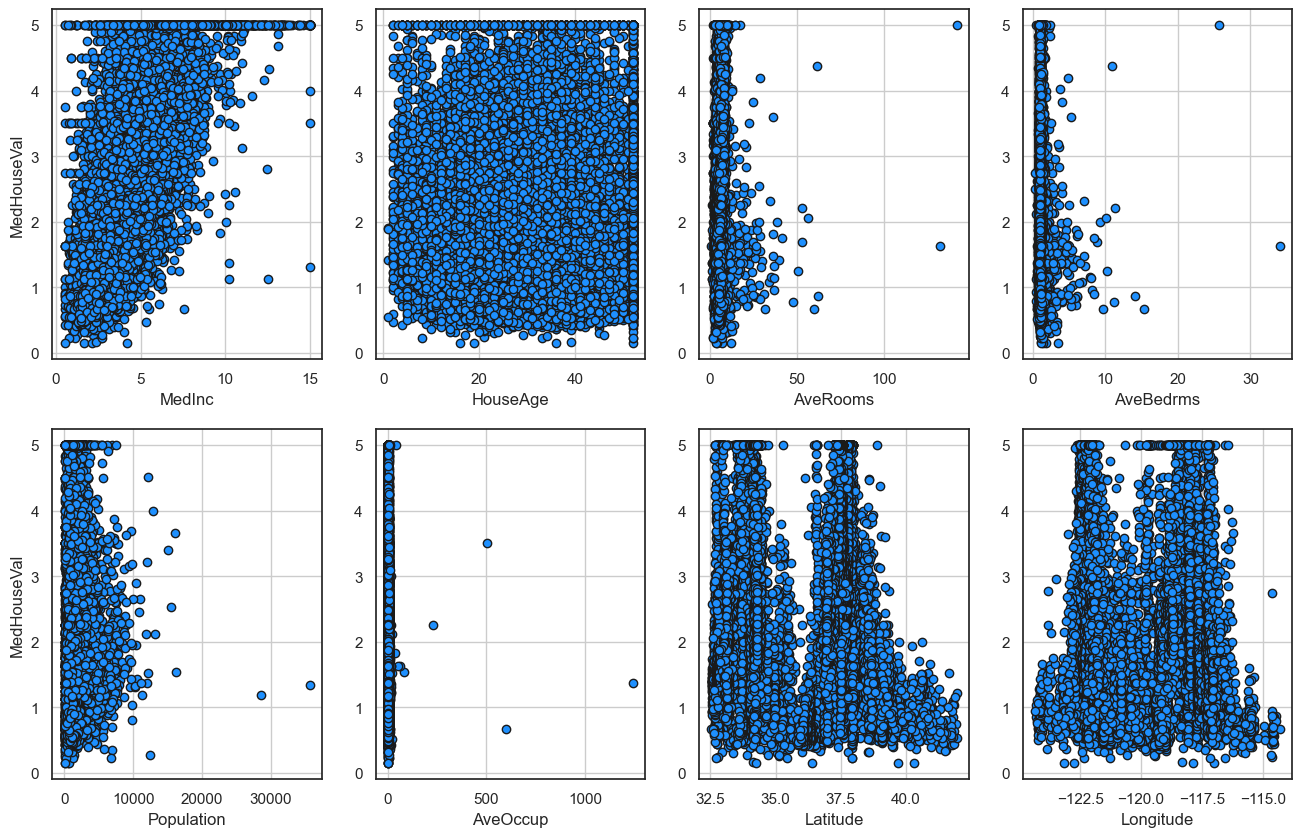

In [9]:
fig, axs = plt.subplots(2,4, figsize=(16, 10))  
for i in range(len(features)):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    axs[row, col].scatter(X[features[i]], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    axs[row, col].grid()
    axs[row, col].set_axisbelow(True)  # Set the grid behind the plot
    # Add y-axis label only for the first column in each row
    if col == 0:
        axs[row, col].set_ylabel("MedHouseVal")
    axs[row, col].set_xlabel(features[i])  # Add subplot title
plt.show()

A continuación se realizó otra representación. Cada tributo se dividió en 8 cuantiles y se realizaron boxplots de la variable objetivo para cada boxplot para observar sus diferencias.

La ventaja de estos gráficos es que podemos observar las diferencias en las medianas para cada cuantil así como la dispersión de 
A ojo se puede concluir:
* MedInc: La mediana para cada cuantil es creciente, lo cual refuerza lo visto en el scatterplot y la conclusión de que esta variable y la variable objetivo poseen una relación creciente.
* HouseAge: No parece haber una dependencia importante en la variable objetivo con la edad promedio de las casas. Se puede observar un ligero crecimiento en la mediana para el último cuantil.
* AveRooms: Para los cuantiles 0 a 4 no se aprecia una diferencia de comportamiento para la variable objetivo. Sin embargo, a partir del cuantil 5 se observa un crecimiento en la mediana lo que indica una relación creciente entre ambas variables.
* AveBedrms: No parece haber una dependencia importante en la variable objetivo con la edad promedio de las casas. Se puede observar un ligero decrecimiento en la mediana para los últimos 3 cuantiles.
* Population: No parece haber una dependencia importante en la variable objetivo con la población. Se puede observar una disminución en la dispersión para los últimos cuantiles lo que indica que para se alcanzan precios menores que para el resto.
* AveOccup: Se observa una ligera disminución en la mediana para cada cuantil, además de una disminución en la dispersión. Esto permite intuir que debe haber una dependencia decreciente entre la variable objetivo y la ocupación promedio.
* Latitude: Se puede observar que para los cuantiles 4 y 7 la variable objetivo tiende a ser menor que para el resto de los cuantiles.
* Longitude: Se puede observar que para los cuantiles 2, 3 y 7 la variable objetivo tiende a ser menor que para el resto de los cuantiles.

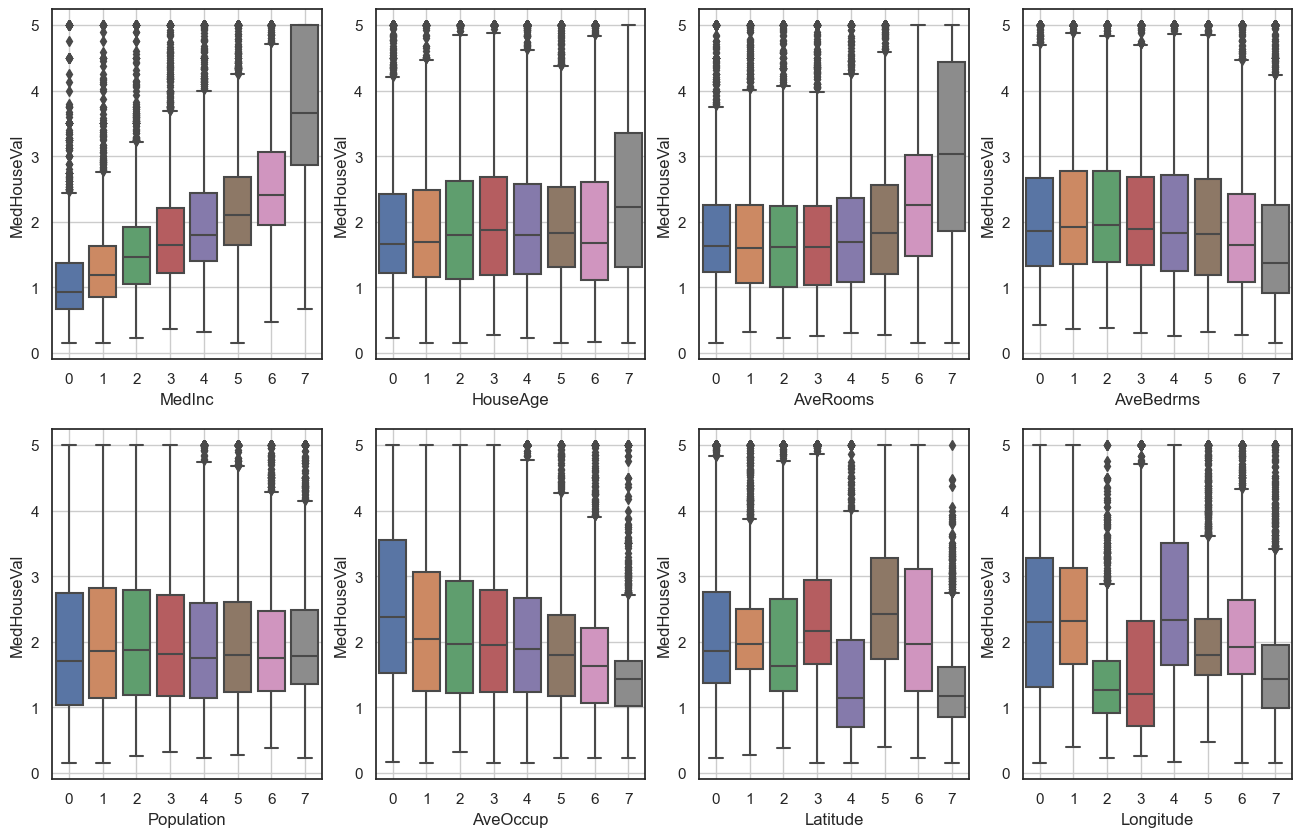

In [10]:
fig, axs = plt.subplots(2,4, figsize=(16, 10))  
for i in range(len(features)):
    row = i // 4  # Calculate the row index
    col = i % 4   # Calculate the column index
    X['quantile'] = pd.qcut(X[features[i]], 8)
    sns.boxplot(X, x=X['quantile'], y=y, ax=axs[row,col])
    axs[row, col].grid()
    axs[row, col].set_axisbelow(True)  # Set the grid behind the plot
    # Add y-axis label only for the first column in each row
    if col == 0:
        axs[row, col].set_ylabel("MedHouseVal")
    axs[row, col].set_xlabel(features[i])  # Add subplot title
    axs[row, col].set_xticklabels(axs[row, col].get_xticks())
plt.show()

A partir de las conclusiones anteriores, creemos que el orden de importancia (de mayor a menor) es el siguiente:
1. MedInc
2. AveRooms
3. Longitude
4. Latitude
5. HouseAge
6. AveOccup
7. Population
8. AveBedrms

---
# Ejercicio 3 - Regresión Lineal

> Consigna: inicio.

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

> Consigna: fin.

In [11]:
# 1. Resolver acá. Ayuda:
feature = 'HouseAge'  # selecciono el atributo 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

InvalidIndexError: (slice(None, None, None), array([False,  True, False, False, False, False, False, False]))

In [ ]:
X_train_f[1]

In [ ]:
# 2. Instanciar y entrenar acá.

In [ ]:
# 3. Predecir y evaluar acá.

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

---
# Ejercicio 4 - Regresión Polinomial

> Consigna: inicio.

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

> Consigna: fin.

In [ ]:
# 1. Resolver acá.

In [ ]:
# 2. Graficar curvas de error acá.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

---
# Ejercicio 5 - Regresión con más de un Atributo

> Consigna: inicio.

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

> Consigna: fin.

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

In [ ]:
# 2. Resolver acá.